In [8]:
pip install pandas pyreadstat


  Using cached pyreadstat-1.2.8-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (1.0 kB)
Using cached pyreadstat-1.2.8-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (2.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd

# Load the Stata file
file_path = "karlan_list_2007.dta"
df = pd.read_stata(file_path)

# Display basic information
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50083 entries, 0 to 50082
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   treatment           50083 non-null  int8    
 1   control             50083 non-null  int8    
 2   ratio               50083 non-null  category
 3   ratio2              50083 non-null  int8    
 4   ratio3              50083 non-null  int8    
 5   size                50083 non-null  category
 6   size25              50083 non-null  int8    
 7   size50              50083 non-null  int8    
 8   size100             50083 non-null  int8    
 9   sizeno              50083 non-null  int8    
 10  ask                 50083 non-null  category
 11  askd1               50083 non-null  int8    
 12  askd2               50083 non-null  int8    
 13  askd3               50083 non-null  int8    
 14  ask1                50083 non-null  int16   
 15  ask2                50

In [10]:
# Show first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   treatment  control    ratio  ratio2  ratio3      size  size25  size50  \
0          0        1  Control       0       0   Control       0       0   
1          0        1  Control       0       0   Control       0       0   
2          1        0        1       0       0  $100,000       0       0   
3          1        0        1       0       0  Unstated       0       0   
4          1        0        1       0       0   $50,000       0       1   

   size100  sizeno  ... redcty  bluecty    pwhite    pblack  page18_39  \
0        0       0  ...    0.0      1.0  0.446493  0.527769   0.317591   
1        0       0  ...    1.0      0.0       NaN       NaN        NaN   
2        1       0  ...    0.0      1.0  0.935706  0.011948   0.276128   
3        0       1  ...    1.0      0.0  0.888331  0.010760   0.279412   
4        0       0  ...    0.0      1.0  0.759014  0.127421   0.442389   

   ave_hh_sz  median_hhincome    powner  psch_atlstba  pop_propurban  
0       2.10

In [11]:
# Show summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:


           treatment       control    ratio        ratio2        ratio3  \
count   50083.000000  50083.000000    50083  50083.000000  50083.000000   
unique           NaN           NaN        4           NaN           NaN   
top              NaN           NaN  Control           NaN           NaN   
freq             NaN           NaN    16687           NaN           NaN   
mean        0.666813      0.333187      NaN      0.222311      0.222211   
std         0.471357      0.471357      NaN      0.415803      0.415736   
min         0.000000      0.000000      NaN      0.000000      0.000000   
25%         0.000000      0.000000      NaN      0.000000      0.000000   
50%         1.000000      0.000000      NaN      0.000000      0.000000   
75%         1.000000      1.000000      NaN      0.000000      0.000000   
max         1.000000      1.000000      NaN      1.000000      1.000000   

           size        size25        size50       size100        sizeno  ...  \
count     50083  50

In [12]:
from scipy.stats import ttest_ind

%pip install statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Ensure consistent data for both t-test and regression
consistent_data = df[['mrm2', 'treatment', 'control', 'intercept']].dropna()

# Perform a t-test
treatment_group = consistent_data[consistent_data['treatment'] == 1]['mrm2']
control_group = consistent_data[consistent_data['control'] == 1]['mrm2']
t_stat, p_value_ttest = ttest_ind(treatment_group, control_group, equal_var=False)

print(f"T-test results:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value_ttest:.4f}")

# Perform a linear regression
model = sm.OLS(consistent_data['mrm2'], consistent_data[['intercept', 'treatment']])
results = model.fit()

print("\nLinear Regression results:")
print(results.summary())

# Confirm the p-value matches
p_value_regression = results.pvalues['treatment']
print(f"\nP-value from regression: {p_value_regression:.4f}")
assert abs(p_value_ttest - p_value_regression) < 1e-6, "P-values do not match!"

KeyError: "['intercept'] not in index"

### Charitable Contribution Made

Proportion of people who donated in the Treatment group: 2.20%
Proportion of people who donated in the Control group: 1.79%


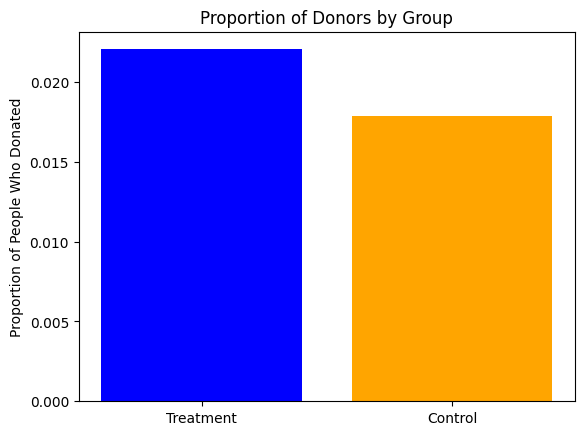

In [ ]:
import matplotlib.pyplot as plt

# Calculate the proportion of people who donated in each group
treatment_proportion = df[df['treatment'] == 1]['gave'].mean()
control_proportion = df[df['control'] == 1]['gave'].mean()

# Create the barplot
plt.bar(['Treatment', 'Control'], [treatment_proportion, control_proportion], color=['blue', 'orange'])
plt.ylabel('Proportion of People Who Donated')
plt.title('Proportion of Donors by Group')
# Display the proportions
print(f"Proportion of people who donated in the Treatment group: {treatment_proportion:.2%}")
print(f"Proportion of people who donated in the Control group: {control_proportion:.2%}")

plt.show()

In [ ]:
# Extract the binary outcome for treatment and control groups
treatment_gave = df[df['treatment'] == 1]['gave'].dropna()
control_gave = df[df['control'] == 1]['gave'].dropna()

# Perform a t-test
t_stat_gave, p_value_gave = ttest_ind(treatment_gave, control_gave, equal_var=False)

print(f"T-test results for charitable donation (gave):")
print(f"T-statistic: {t_stat_gave:.4f}, P-value: {p_value_gave:.4f}")

T-test results for charitable donation (gave):
T-statistic: 3.2095, P-value: 0.0013


In [ ]:
# Perform a bivariate linear regression
bivariate_model = sm.OLS(df['gave'], df[['intercept', 'treatment']])
bivariate_results = bivariate_model.fit()

print("\nBivariate Linear Regression results:")
print(bivariate_results.summary())

# Extract the p-value for the treatment variable
bivariate_p_value = bivariate_results.pvalues['treatment']
print(f"\nP-value for treatment in bivariate regression: {bivariate_p_value:.4f}")


Bivariate Linear Regression results:
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Mon, 21 Apr 2025   Prob (F-statistic):            0.00193
Time:                        18:52:25   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     

In [ ]:
# Perform a probit regression
probit_model = smf.probit('gave ~ treatment', data=df)
probit_results = probit_model.fit()

# Display the summary of the probit regression
print("\nProbit Regression results:")
print(probit_results.summary())

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7

Probit Regression results:
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        18:53:24   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1001      0.023    -90.073      0.000      -2.146      -2.054
t

### Differences between Match Rates

In [ ]:
# Extract unique match ratios
match_ratios = df['ratio'].unique()

# Perform pairwise t-tests between match ratios
for i in range(len(match_ratios)):
    for j in range(i + 1, len(match_ratios)):
        ratio1 = match_ratios[i]
        ratio2 = match_ratios[j]
        
        # Filter data for the two match ratios
        group1 = df[df['ratio'] == ratio1]['gave'].dropna()
        group2 = df[df['ratio'] == ratio2]['gave'].dropna()
        
        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
        
        # Print results
        print(f"T-test between match ratios {ratio1} and {ratio2}:")
        print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")

T-test between match ratios Control and 1:
T-statistic: -1.7046, P-value: 0.0883

T-test between match ratios Control and 2:
T-statistic: -2.7396, P-value: 0.0062

T-test between match ratios Control and 3:
T-statistic: -2.7926, P-value: 0.0052

T-test between match ratios 1 and 2:
T-statistic: -0.9650, P-value: 0.3345

T-test between match ratios 1 and 3:
T-statistic: -1.0150, P-value: 0.3101

T-test between match ratios 2 and 3:
T-statistic: -0.0501, P-value: 0.9600



In [ ]:
# Create the variable `ratio1` from the `ratio` column
df['ratio1'] = (df['ratio'] == 1).astype(int)

# Perform the regression
regression_model = sm.OLS(df['gave'], df[['intercept', 'ratio1', 'ratio2', 'ratio3']])
regression_results = regression_model.fit()

# Display the regression results
print("\nRegression results:")
print(regression_results.summary())


Regression results:
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.665
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0118
Time:                        18:56:18   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50079   BIC:                        -5.322e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0179      0.00

In [ ]:
# Perform the regression of `gave` on the categorical variable `ratio`
ratio_dummies = pd.get_dummies(df['ratio'], drop_first=True).astype(int)  # Create dummy variables for `ratio` and convert to integers
regression_model_ratio = sm.OLS(df['gave'], sm.add_constant(ratio_dummies))  # Add constant for intercept
regression_results_ratio = regression_model_ratio.fit()

# Display the regression results
print("\nRegression results for `gave` on `ratio`:")
print(regression_results_ratio.summary())


Regression results for `gave` on `ratio`:
                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.665
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0118
Time:                        18:57:14   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50079   BIC:                        -5.322e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [ ]:
# Directly from the data
response_rate_1_1 = df[df['ratio'] == 1]['gave'].mean()
response_rate_2_1 = df[df['ratio'] == 2]['gave'].mean()
response_rate_3_1 = df[df['ratio'] == 3]['gave'].mean()

difference_1_1_2_1 = response_rate_1_1 - response_rate_2_1
difference_2_1_3_1 = response_rate_2_1 - response_rate_3_1

print(f"Response rate difference (1:1 - 2:1): {difference_1_1_2_1:.4f}")
print(f"Response rate difference (2:1 - 3:1): {difference_2_1_3_1:.4f}")

# Using fitted coefficients from the regression
coefficients = regression_results_ratio.params
difference_1_1_2_1_coeff = coefficients[1]  # Coefficient for ratio 2
difference_2_1_3_1_coeff = coefficients[2] - coefficients[1]  # Difference between coefficients for ratio 3 and ratio 2

print(f"Response rate difference from coefficients (1:1 - 2:1): {difference_1_1_2_1_coeff:.4f}")
print(f"Response rate difference from coefficients (2:1 - 3:1): {difference_2_1_3_1_coeff:.4f}")

Response rate difference (1:1 - 2:1): -0.0019
Response rate difference (2:1 - 3:1): -0.0001
Response rate difference from coefficients (1:1 - 2:1): 0.0029
Response rate difference from coefficients (2:1 - 3:1): 0.0019


Increasing donation match ratios from 1:1 to 2:1 slightly boosts response rates, but moving from 2:1 to 3:1 offers minimal additional impact. Response rates rise from 2.07% (1:1) to 2.26% (2:1) and only slightly to 2.27% (3:1), with diminishing returns evident in both response differences and regression coefficients. This suggests that while a moderate increase in match size can be effective, higher ratios beyond 2:1 may not significantly enhance donor motivation.

### Size of Charitable Contribution

In [ ]:
# Perform a bivariate linear regression of donation amount on treatment status
bivariate_amount_model = sm.OLS(df['amount'], df[['intercept', 'treatment']])
bivariate_amount_results = bivariate_amount_model.fit()

# Display the regression results
print("\nBivariate Linear Regression results for donation amount on treatment status:")
print(bivariate_amount_results.summary())


Bivariate Linear Regression results for donation amount on treatment status:
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.461
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0628
Time:                        19:10:35   Log-Likelihood:            -1.7946e+05
No. Observations:               50083   AIC:                         3.589e+05
Df Residuals:                   50081   BIC:                         3.589e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Observations:

Effect of Treatment on Donation Amount:
The coefficient for the treatment variable is 0.1536, indicating that being in the treatment group (e.g., exposed to a donation match offer) is associated with an increase of approximately $0.15 in the average donation amount. However, this effect is not statistically significant at the conventional 5% level (p = 0.063), suggesting we cannot confidently conclude that treatment has a real impact on donation amount.

Model Fit:
The R-squared value is 0.000, indicating that the model explains virtually none of the variation in donation amount. This is common in social science data but implies that other factors (beyond just treatment status) are likely influencing donation amounts.

Statistical Significance:
While the p-value for the treatment variable (0.063) is close to 0.05, it slightly exceeds it, meaning the result is only marginally significant. This suggests a possible, but weak, effect of treatment on donation amount that might warrant further investigation with a larger sample or additional controls.

Baseline Donation Amount:
The intercept is 0.8133, indicating that individuals in the control group donated around $0.81 on average.

In [ ]:
# Filter the data to include only people who made a donation
donors_df = df[df['gave'] == 1]

# Perform a bivariate linear regression of donation amount on treatment status for donors
bivariate_donors_model = sm.OLS(donors_df['amount'], donors_df[['intercept', 'treatment']])
bivariate_donors_results = bivariate_donors_model.fit()

# Display the regression results
print("\nBivariate Linear Regression results for donation amount on treatment status (donors only):")
print(bivariate_donors_results.summary())


Bivariate Linear Regression results for donation amount on treatment status (donors only):
                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3374
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.561
Time:                        19:13:31   Log-Likelihood:                -5326.8
No. Observations:                1034   AIC:                         1.066e+04
Df Residuals:                    1032   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

INTERPRETATIONS:
- Donors in the treatment group gave about $1.67 less on average than those in the control group. However, this difference is not statistically significant (p-value = 0.561), meaning we can’t confidently say it’s a real effect.

- There’s no strong evidence that treatment affects the amount donated, conditional on donating.

- The treatment coefficient should not be interpreted causally because the sample is restricted to donors only.

- Treatment could influence both whether someone donates and how much they give. By only analyzing donors, we’re conditioning on a post-treatment outcome, which can lead to biased estimates (known as collider bias).



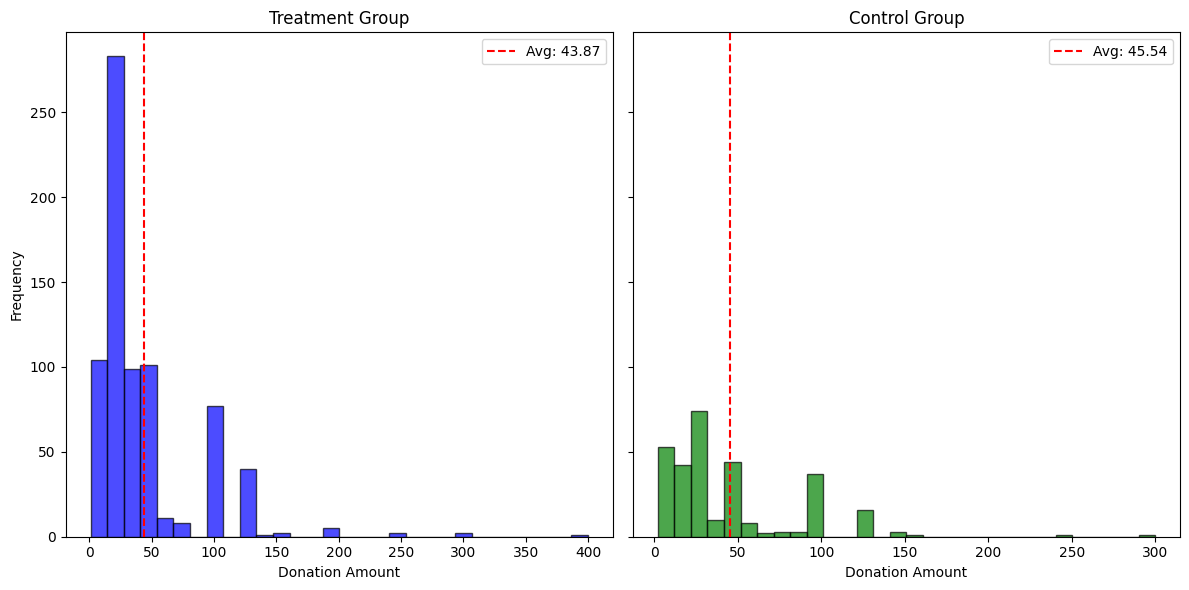

In [ ]:
import matplotlib.pyplot as plt

# Filter donation amounts for treatment and control groups among donors
treatment_donations = donors_df[donors_df['treatment'] == 1]['amount']
control_donations = donors_df[donors_df['control'] == 1]['amount']

# Calculate the sample averages
treatment_avg = treatment_donations.mean()
control_avg = control_donations.mean()

# Create the histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Treatment group histogram
axes[0].hist(treatment_donations, bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0].axvline(treatment_avg, color='red', linestyle='--', label=f'Avg: {treatment_avg:.2f}')
axes[0].set_title('Treatment Group')
axes[0].set_xlabel('Donation Amount')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Control group histogram
axes[1].hist(control_donations, bins=30, color='green', alpha=0.7, edgecolor='black')
axes[1].axvline(control_avg, color='red', linestyle='--', label=f'Avg: {control_avg:.2f}')
axes[1].set_title('Control Group')
axes[1].set_xlabel('Donation Amount')
axes[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

## Simulation Experiment

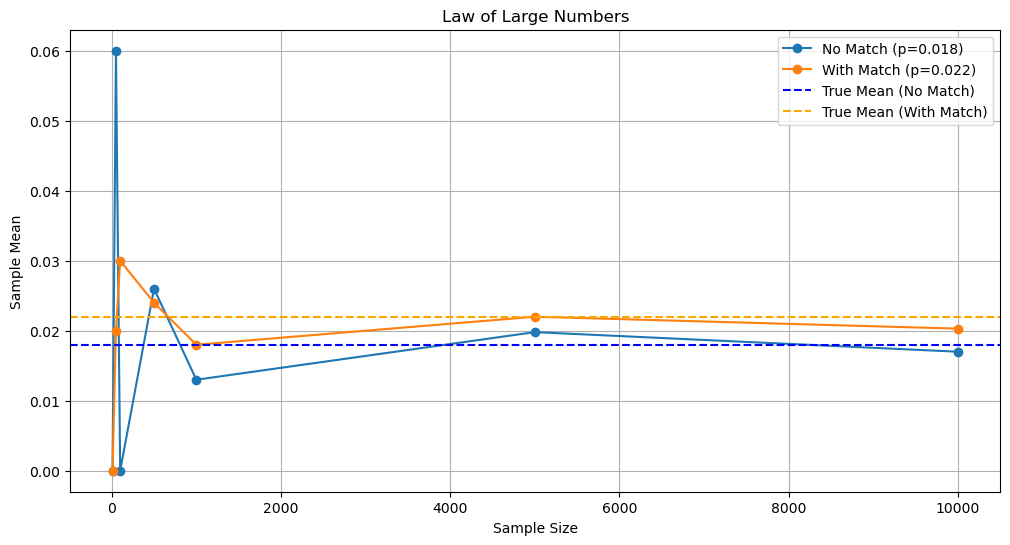

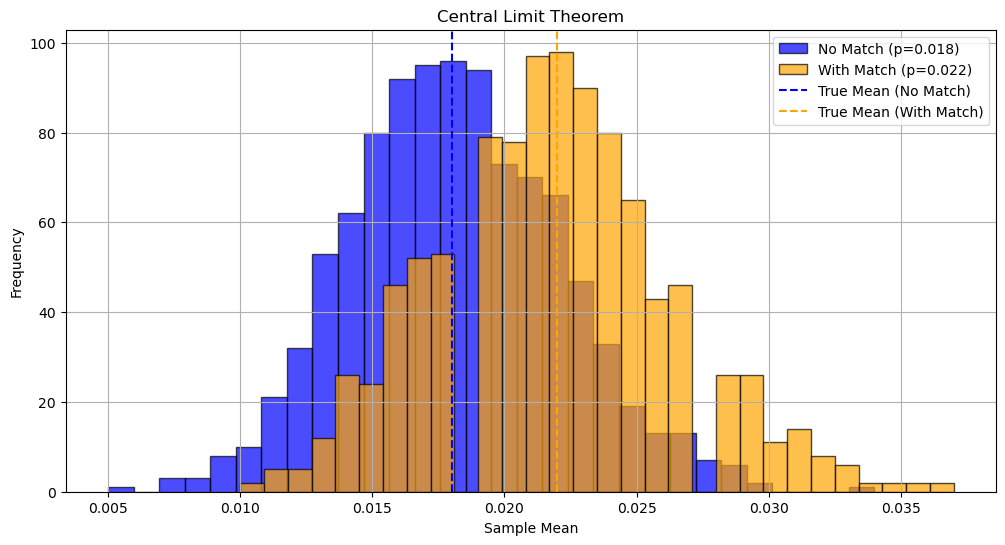

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# Parameters
p_no_match = 0.018  # Probability of donation without match
p_with_match = 0.022  # Probability of donation with match
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]  # Different sample sizes
num_simulations = 1000  # Number of simulations for CLT

# Law of Large Numbers (LLN)
means_no_match = []
means_with_match = []

for size in sample_sizes:
    sample_no_match = np.random.binomial(1, p_no_match, size)
    sample_with_match = np.random.binomial(1, p_with_match, size)
    means_no_match.append(np.mean(sample_no_match))
    means_with_match.append(np.mean(sample_with_match))

# Plot LLN
plt.figure(figsize=(12, 6))
plt.plot(sample_sizes, means_no_match, label="No Match (p=0.018)", marker='o')
plt.plot(sample_sizes, means_with_match, label="With Match (p=0.022)", marker='o')
plt.axhline(y=p_no_match, color='blue', linestyle='--', label="True Mean (No Match)")
plt.axhline(y=p_with_match, color='orange', linestyle='--', label="True Mean (With Match)")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Law of Large Numbers")
plt.legend()
plt.grid()
plt.show()

# Central Limit Theorem (CLT)
sample_means_no_match = []
sample_means_with_match = []

for _ in range(num_simulations):
    sample_no_match = np.random.binomial(1, p_no_match, 1000)  # Fixed sample size
    sample_with_match = np.random.binomial(1, p_with_match, 1000)
    sample_means_no_match.append(np.mean(sample_no_match))
    sample_means_with_match.append(np.mean(sample_with_match))

# Plot CLT
plt.figure(figsize=(12, 6))
plt.hist(sample_means_no_match, bins=30, alpha=0.7, label="No Match (p=0.018)", color='blue', edgecolor='black')
plt.hist(sample_means_with_match, bins=30, alpha=0.7, label="With Match (p=0.022)", color='orange', edgecolor='black')
plt.axvline(x=p_no_match, color='blue', linestyle='--', label="True Mean (No Match)")
plt.axvline(x=p_with_match, color='orange', linestyle='--', label="True Mean (With Match)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.title("Central Limit Theorem")
plt.legend()
plt.grid()
plt.show()

### Law of Large Numbers

In [ ]:
import numpy as np

# Filter the control group
control_amounts = df[df['control'] == 1]['amount']

# Simulate 100,000 draws from the control distribution
simulated_draws = np.random.choice(control_amounts, size=100000, replace=True)

# Display summary statistics of the simulated draws
print(f"Simulated Draws Summary:")
print(f"Mean: {np.mean(simulated_draws):.4f}")
print(f"Standard Deviation: {np.std(simulated_draws):.4f}")
print(f"Min: {np.min(simulated_draws):.4f}")
print(f"Max: {np.max(simulated_draws):.4f}")

Simulated Draws Summary:
Mean: 0.8309
Standard Deviation: 8.1906
Min: 0.0000
Max: 300.0000


In [ ]:
# Filter the treatment group
treatment_amounts = df[df['treatment'] == 1]['amount']

# Simulate 10,000 draws from the treatment distribution
simulated_treatment_draws = np.random.choice(treatment_amounts, size=10000, replace=True)

# Display summary statistics of the simulated treatment draws
print(f"Simulated Treatment Draws Summary:")
print(f"Mean: {np.mean(simulated_treatment_draws):.4f}")
print(f"Standard Deviation: {np.std(simulated_treatment_draws):.4f}")
print(f"Min: {np.min(simulated_treatment_draws):.4f}")
print(f"Max: {np.max(simulated_treatment_draws):.4f}")

Simulated Treatment Draws Summary:
Mean: 0.9502
Standard Deviation: 9.6119
Min: 0.0000
Max: 400.0000


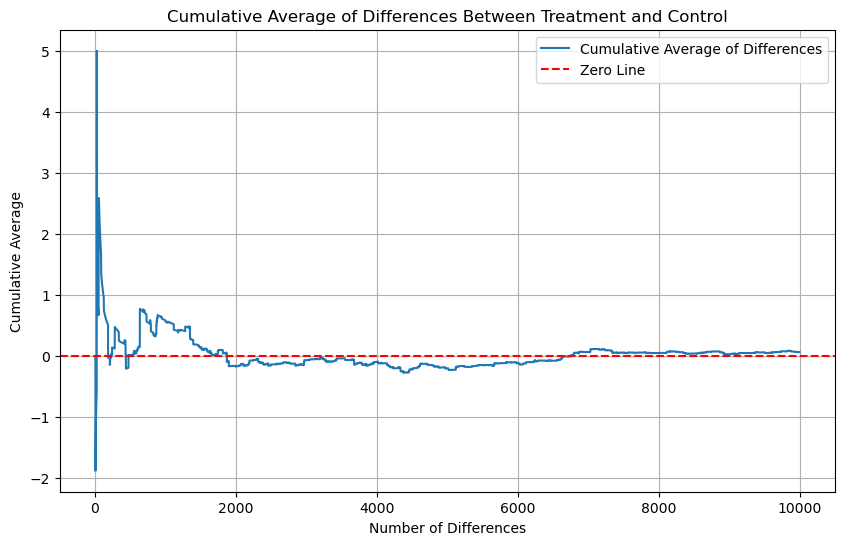

In [20]:
# Simulate 100,000 draws from the control distribution
simulated_control_draws = np.random.choice(control_amounts, size=100000, replace=True)

# Simulate 10,000 draws from the treatment distribution
simulated_treatment_draws = np.random.choice(treatment_amounts, size=10000, replace=True)

# Calculate a vector of 10,000 differences
differences = simulated_treatment_draws - simulated_control_draws[:10000]

# Calculate the cumulative average of the differences
cumulative_avg = np.cumsum(differences) / np.arange(1, len(differences) + 1)

# Plot the cumulative average
plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg, label="Cumulative Average of Differences")
plt.axhline(0, color='red', linestyle='--', label="Zero Line")
plt.xlabel("Number of Differences")
plt.ylabel("Cumulative Average")
plt.title("Cumulative Average of Differences Between Treatment and Control")
plt.legend()
plt.grid()
plt.show()


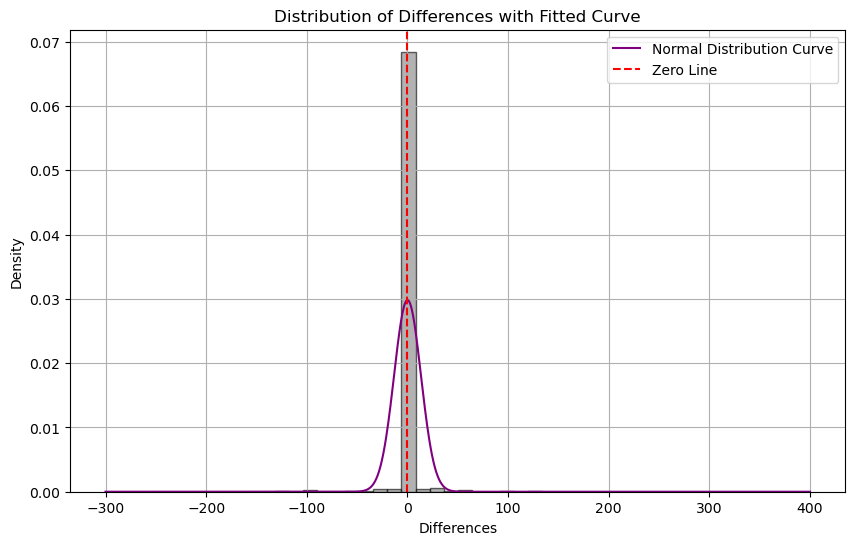

In [ ]:
from scipy.stats import norm

# Add a distribution curve to the plot
# Fit a normal distribution to the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences)

# Generate x values for the curve
x = np.linspace(min(differences), max(differences), 1000)
y = norm.pdf(x, mean_diff, std_diff)

# Plot the distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Normal Distribution Curve", color='purple')
plt.hist(differences, bins=50, density=True, alpha=0.6, color='gray', edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label="Zero Line")
plt.xlabel("Differences")
plt.ylabel("Density")
plt.title("Distribution of Differences with Fitted Curve")
plt.legend()
plt.grid()
plt.show()